# Deep Learning + Wang-Landau
---

Simple notebook implementing project. Replaces `main.py` in `deep_learning` package.

By: William Tong (wlt2115)

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

from deep_learning import model
from deep_learning import util

%matplotlib inline
%config IPCompleter.greedy=True

## Global configs

In [2]:
LOG_DIR = Path(r'/home/grandpaa/workspace/deep_learning/logs')

RUN_NAME = 'mnist_fine'
# TB_DIR = LOG_DIR / 'tensorboard' / RUN_NAME
WL_DIR = LOG_DIR / 'wang_landau' / RUN_NAME

## Helper functions

In [3]:
def _rand_sample(size: int, domain: tuple) -> np.ndarray:
    samp = np.random.random_sample(size) \
           * (domain[1] - domain[0]) \
           + domain[0]
    return samp

In [4]:
def _train_model(model: tf.keras.models.Model,
                 data: np.ndarray,
                 labels: np.ndarray,
                 epochs: int = 100,
                 val_data: np.ndarray = None,
                 val_labels: np.ndarray = None) -> 'Model':
    kwargs = {}
    if val_data is not None and val_labels is not None:
        kwargs['validation_data'] = (val_data, val_labels)

        tensorboard = tf.keras.callbacks.TensorBoard(log_dir=TB_DIR,
                                                     histogram_freq=2)
        kwargs['callbacks'] = [tensorboard]

    model.fit(data, labels,
              epochs=epochs, batch_size=32,
              **kwargs)
    return model

In [5]:
def _get_density(values: list) -> list:
    total = sum(values)
    densities = [value / total for value in values]
    
    return densities

## Define model / energy func

In [6]:
SAVE_PATH = r'/home/grandpaa/workspace/deep_learning/mnist_model.h5py'
model = tf.keras.models.load_model(SAVE_PATH)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
def energy_func(x: np.ndarray) -> int:
    x = x.reshape(1, 28, 28)
    pred = model.predict(x)
    return np.argmax(pred[0])

## Release the Dragons!

In [8]:
wl_configs = {
    'energy' : energy_func,
    
    'domain': np.array([0, 1]*28*28).reshape(28*28, -1),
    'energy_range': range(10),

    'flatness': 0.95,
    'step_size': 1,

    'max_iterations': 250000,
    'check_every': 200,
    'save_every': 2000,
    'log_dir': WL_DIR
}

freqs, hist = util.wang_landau(**wl_configs)

INFO:root:Iteration 200 f=1.000000
INFO:root:At check, min: 29.000000 mean: 40.000000
INFO:root:Iteration 400 f=1.000000
INFO:root:At check, min: 29.000000 mean: 80.000000
INFO:root:Iteration 600 f=1.000000
INFO:root:At check, min: 29.000000 mean: 100.000000
INFO:root:Iteration 800 f=1.000000
INFO:root:At check, min: 109.000000 mean: 133.333333
INFO:root:Iteration 1000 f=1.000000
INFO:root:At check, min: 109.000000 mean: 166.666667
INFO:root:Iteration 1200 f=1.000000
INFO:root:At check, min: 109.000000 mean: 200.000000
INFO:root:Iteration 1400 f=1.000000
INFO:root:At check, min: 109.000000 mean: 233.333333
INFO:root:Iteration 1600 f=1.000000
INFO:root:At check, min: 109.000000 mean: 266.666667
INFO:root:Iteration 1800 f=1.000000
INFO:root:At check, min: 109.000000 mean: 300.000000
INFO:root:Iteration 2000 f=1.000000
INFO:root:At check, min: 109.000000 mean: 333.333333
INFO:root:Iteration 2200 f=1.000000
INFO:root:At check, min: 95.000000 mean: 314.285714
INFO:root:Iteration 2400 f=1.00

INFO:root:Iteration 18400 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1228.571429
INFO:root:Iteration 18600 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1257.142857
INFO:root:Iteration 18800 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1285.714286
INFO:root:Iteration 19000 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1314.285714
INFO:root:Iteration 19200 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1342.857143
INFO:root:Iteration 19400 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1371.428571
INFO:root:Iteration 19600 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1400.000000
INFO:root:Iteration 19800 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1428.571429
INFO:root:Iteration 20000 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1457.142857
INFO:root:Iteration 20200 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1485.714286
INFO:root:Iteration 20400 f=0.250000
INFO:root:At check, min: 378.000000 mean: 1514.285714

INFO:root:Iteration 36400 f=0.031250
INFO:root:At check, min: 450.000000 mean: 714.285714
INFO:root:Iteration 36600 f=0.031250
INFO:root:At check, min: 492.000000 mean: 742.857143
INFO:root:Iteration 36800 f=0.031250
INFO:root:At check, min: 517.000000 mean: 771.428571
INFO:root:Iteration 37000 f=0.031250
INFO:root:At check, min: 517.000000 mean: 800.000000
INFO:root:Iteration 37200 f=0.031250
INFO:root:At check, min: 517.000000 mean: 828.571429
INFO:root:Iteration 37400 f=0.031250
INFO:root:At check, min: 517.000000 mean: 857.142857
INFO:root:Iteration 37600 f=0.031250
INFO:root:At check, min: 588.000000 mean: 885.714286
INFO:root:Iteration 37800 f=0.031250
INFO:root:At check, min: 629.000000 mean: 914.285714
INFO:root:Iteration 38000 f=0.031250
INFO:root:At check, min: 650.000000 mean: 942.857143
INFO:root:Iteration 38200 f=0.031250
INFO:root:At check, min: 692.000000 mean: 971.428571
INFO:root:Iteration 38400 f=0.031250
INFO:root:At check, min: 737.000000 mean: 1000.000000
INFO:root

INFO:root:At check, min: 2127.000000 mean: 3257.142857
INFO:root:Iteration 54400 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3285.714286
INFO:root:Iteration 54600 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3314.285714
INFO:root:Iteration 54800 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3342.857143
INFO:root:Iteration 55000 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3371.428571
INFO:root:Iteration 55200 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3400.000000
INFO:root:Iteration 55400 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3428.571429
INFO:root:Iteration 55600 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3457.142857
INFO:root:Iteration 55800 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3485.714286
INFO:root:Iteration 56000 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3514.285714
INFO:root:Iteration 56200 f=0.031250
INFO:root:At check, min: 2127.000000 mean: 3542.857143
INFO:root:Iteration 56400

INFO:root:At check, min: 248.000000 mean: 714.285714
INFO:root:Iteration 72200 f=0.007812
INFO:root:At check, min: 248.000000 mean: 742.857143
INFO:root:Iteration 72400 f=0.007812
INFO:root:At check, min: 266.000000 mean: 771.428571
INFO:root:Iteration 72600 f=0.007812
INFO:root:At check, min: 266.000000 mean: 800.000000
INFO:root:Iteration 72800 f=0.007812
INFO:root:At check, min: 363.000000 mean: 828.571429
INFO:root:Iteration 73000 f=0.007812
INFO:root:At check, min: 400.000000 mean: 857.142857
INFO:root:Iteration 73200 f=0.007812
INFO:root:At check, min: 452.000000 mean: 885.714286
INFO:root:Iteration 73400 f=0.007812
INFO:root:At check, min: 493.000000 mean: 914.285714
INFO:root:Iteration 73600 f=0.007812
INFO:root:At check, min: 518.000000 mean: 942.857143
INFO:root:Iteration 73800 f=0.007812
INFO:root:At check, min: 518.000000 mean: 971.428571
INFO:root:Iteration 74000 f=0.007812
INFO:root:At check, min: 524.000000 mean: 1000.000000
INFO:root:Iteration 74200 f=0.007812
INFO:root

INFO:root:Iteration 90000 f=0.007812
INFO:root:At check, min: 2702.000000 mean: 3285.714286
INFO:root:Iteration 90200 f=0.007812
INFO:root:At check, min: 2733.000000 mean: 3314.285714
INFO:root:Iteration 90400 f=0.007812
INFO:root:At check, min: 2742.000000 mean: 3342.857143
INFO:root:Iteration 90600 f=0.007812
INFO:root:At check, min: 2744.000000 mean: 3371.428571
INFO:root:Iteration 90800 f=0.007812
INFO:root:At check, min: 2744.000000 mean: 3400.000000
INFO:root:Iteration 91000 f=0.007812
INFO:root:At check, min: 2751.000000 mean: 3428.571429
INFO:root:Iteration 91200 f=0.007812
INFO:root:At check, min: 2788.000000 mean: 3457.142857
INFO:root:Iteration 91400 f=0.007812
INFO:root:At check, min: 2851.000000 mean: 3485.714286
INFO:root:Iteration 91600 f=0.007812
INFO:root:At check, min: 2851.000000 mean: 3514.285714
INFO:root:Iteration 91800 f=0.007812
INFO:root:At check, min: 2851.000000 mean: 3542.857143
INFO:root:Iteration 92000 f=0.007812
INFO:root:At check, min: 2981.000000 mean: 

INFO:root:Iteration 107800 f=0.007812
INFO:root:At check, min: 5279.000000 mean: 5828.571429
INFO:root:Iteration 108000 f=0.007812
INFO:root:At check, min: 5281.000000 mean: 5857.142857
INFO:root:Iteration 108200 f=0.007812
INFO:root:At check, min: 5343.000000 mean: 5885.714286
INFO:root:Iteration 108400 f=0.007812
INFO:root:At check, min: 5409.000000 mean: 5914.285714
INFO:root:Iteration 108600 f=0.007812
INFO:root:At check, min: 5416.000000 mean: 5942.857143
INFO:root:Iteration 108800 f=0.007812
INFO:root:At check, min: 5458.000000 mean: 5971.428571
INFO:root:Iteration 109000 f=0.007812
INFO:root:At check, min: 5458.000000 mean: 6000.000000
INFO:root:Iteration 109200 f=0.007812
INFO:root:At check, min: 5465.000000 mean: 6028.571429
INFO:root:Iteration 109400 f=0.007812
INFO:root:At check, min: 5465.000000 mean: 6057.142857
INFO:root:Iteration 109600 f=0.007812
INFO:root:At check, min: 5465.000000 mean: 6085.714286
INFO:root:Iteration 109800 f=0.007812
INFO:root:At check, min: 5465.00

INFO:root:At check, min: 7277.000000 mean: 8342.857143
INFO:root:Iteration 125600 f=0.007812
INFO:root:At check, min: 7426.000000 mean: 8371.428571
INFO:root:Iteration 125800 f=0.007812
INFO:root:At check, min: 7626.000000 mean: 8400.000000
INFO:root:Iteration 126000 f=0.007812
INFO:root:At check, min: 7826.000000 mean: 8428.571429
INFO:root:Iteration 126200 f=0.007812
INFO:root:At check, min: 7890.000000 mean: 8457.142857
INFO:root:Iteration 126400 f=0.007812
INFO:root:At check, min: 7890.000000 mean: 8485.714286
INFO:root:Iteration 126600 f=0.007812
INFO:root:At check, min: 7907.000000 mean: 8514.285714
INFO:root:Iteration 126800 f=0.007812
INFO:root:At check, min: 7941.000000 mean: 8542.857143
INFO:root:Iteration 127000 f=0.007812
INFO:root:At check, min: 7941.000000 mean: 8571.428571
INFO:root:Iteration 127200 f=0.007812
INFO:root:At check, min: 7941.000000 mean: 8600.000000
INFO:root:Iteration 127400 f=0.007812
INFO:root:At check, min: 7944.000000 mean: 8628.571429
INFO:root:Itera

INFO:root:Iteration 143200 f=0.003906
INFO:root:At check, min: 1166.000000 mean: 1542.857143
INFO:root:Iteration 143400 f=0.003906
INFO:root:At check, min: 1166.000000 mean: 1571.428571
INFO:root:Iteration 143600 f=0.003906
INFO:root:At check, min: 1166.000000 mean: 1600.000000
INFO:root:Iteration 143800 f=0.003906
INFO:root:At check, min: 1280.000000 mean: 1628.571429
INFO:root:Iteration 144000 f=0.003906
INFO:root:At check, min: 1331.000000 mean: 1657.142857
INFO:root:Iteration 144200 f=0.003906
INFO:root:At check, min: 1331.000000 mean: 1685.714286
INFO:root:Iteration 144400 f=0.003906
INFO:root:At check, min: 1331.000000 mean: 1714.285714
INFO:root:Iteration 144600 f=0.003906
INFO:root:At check, min: 1331.000000 mean: 1742.857143
INFO:root:Iteration 144800 f=0.003906
INFO:root:At check, min: 1331.000000 mean: 1771.428571
INFO:root:Iteration 145000 f=0.003906
INFO:root:At check, min: 1463.000000 mean: 1800.000000
INFO:root:Iteration 145200 f=0.003906
INFO:root:At check, min: 1521.00

INFO:root:Iteration 160800 f=0.001953
INFO:root:At check, min: 25.000000 mean: 57.142857
INFO:root:Iteration 161000 f=0.001953
INFO:root:At check, min: 25.000000 mean: 85.714286
INFO:root:Iteration 161200 f=0.001953
INFO:root:At check, min: 25.000000 mean: 114.285714
INFO:root:Iteration 161400 f=0.001953
INFO:root:At check, min: 25.000000 mean: 142.857143
INFO:root:Iteration 161600 f=0.001953
INFO:root:At check, min: 25.000000 mean: 171.428571
INFO:root:Iteration 161800 f=0.001953
INFO:root:At check, min: 25.000000 mean: 200.000000
INFO:root:Iteration 162000 f=0.001953
INFO:root:At check, min: 25.000000 mean: 228.571429
INFO:root:Iteration 162200 f=0.001953
INFO:root:At check, min: 25.000000 mean: 257.142857
INFO:root:Iteration 162400 f=0.001953
INFO:root:At check, min: 25.000000 mean: 285.714286
INFO:root:Iteration 162600 f=0.001953
INFO:root:At check, min: 25.000000 mean: 314.285714
INFO:root:Iteration 162800 f=0.001953
INFO:root:At check, min: 25.000000 mean: 342.857143
INFO:root:It

INFO:root:At check, min: 1866.000000 mean: 2600.000000
INFO:root:Iteration 178800 f=0.001953
INFO:root:At check, min: 1866.000000 mean: 2628.571429
INFO:root:Iteration 179000 f=0.001953
INFO:root:At check, min: 2007.000000 mean: 2657.142857
INFO:root:Iteration 179200 f=0.001953
INFO:root:At check, min: 2207.000000 mean: 2685.714286
INFO:root:Iteration 179400 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2714.285714
INFO:root:Iteration 179600 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2742.857143
INFO:root:Iteration 179800 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2771.428571
INFO:root:Iteration 180000 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2800.000000
INFO:root:Iteration 180200 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2828.571429
INFO:root:Iteration 180400 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2857.142857
INFO:root:Iteration 180600 f=0.001953
INFO:root:At check, min: 2224.000000 mean: 2885.714286
INFO:root:Itera

<Figure size 432x288 with 0 Axes>

## Parse results

bins:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
valus:	 [1890.462890625, 0, 1898.0703125, 1894.16796875, 0, 1898.3671875, 1897.63671875, 1896.6328125, 1890.677734375, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
densities:	  [0.00015272187827856669, 0.0, 0.3074415765383201, 0.006208636609134662, 0.0, 0.4137078606769025, 0.19927610476052982, 0.07302377508338077, 0.00018932445345362168, 0.0]


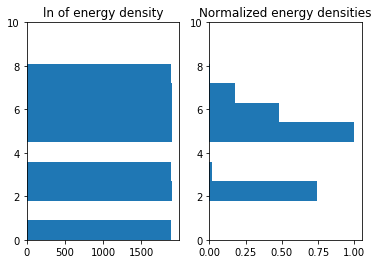

In [9]:
bins = list(freqs.keys())
values = list(freqs.values())
print('bins:\t', bins)
print('valus:\t', values)

plt.subplot(121)
plt.title("ln of energy density")
print(bins)
plt.hist(bins, weights=values, bins=len(bins), orientation='horizontal')
plt.ylim((0, 10))

plt.subplot(122)
max_val = max(values)
norm_values = [np.e ** (value - max_val) for value in values]
plt.title("Normalized energy densities")
plt.hist(bins, weights=norm_values, bins=len(bins), orientation='horizontal')
plt.ylim((0, 10))

print('densities:\t ', _get_density(norm_values))

## Manual verification

In [10]:
# line = np.arange(0, 50, 1)
# box = np.array([(x, y, z) for x in line for y in line for z in line])

# counts = list(range(10))
# energy_func = wl_configs['energy']
# for point in box:
#     counts[energy_func(point)] += 1

# brute_force_dens = _get_density(counts)
# print(brute_force_dens)